# Polynomial Linear Regression

### Polinomlar çok terimli fonksiyonlardır.
## P(x) = a₀ + a₁.x¹ + a₂.x² + a₃.x³ + ... +aᵢ.xᶤ



#

## Polynomial Linear Regression modelinin kullanılma sebebini bir dataset ile inceleyelim;

#

## Datasetimizi alıyor ve inceliyoruz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("usOilCompanySalaries.csv", sep = ";")
df

,Position,Level,Salary
0,Business Analys,1,4500
1,Junior Consultant,2,5000
2,Senior Consultant,3,6000
3,Manager,4,8000
4,Country Manager,5,11000
5,Region Manager,6,15000
6,Partner,7,20000
7,Senior Partner,8,30000
8,C-Level,9,50000
9,CEO,10,100000


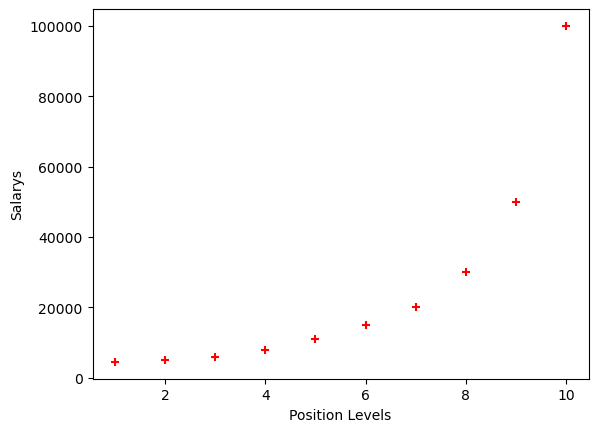

In [3]:
#scatter plot ile data setimizi inceliyoruz
plt.xlabel('Position Levels')
plt.ylabel('Salarys')
plt.scatter(df.Level , df.Salary , color="red" , marker = "+")

## Modeli Linear Regression ile eğittiğimizde oluşacak sonuca bakıyoruz

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['Level']],df['Salary'])

LinearRegression()

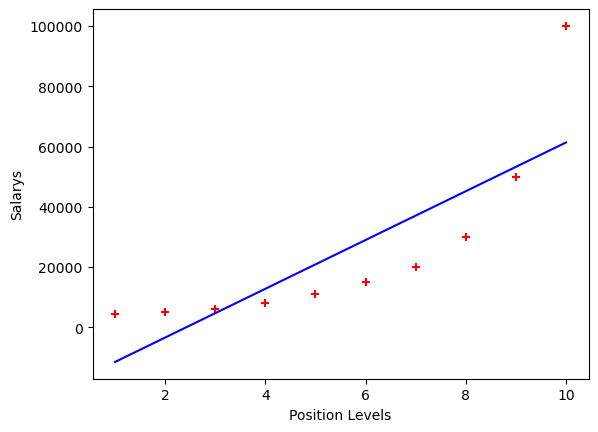

In [5]:
plt.xlabel('Position Levels')
plt.ylabel('Salarys')
plt.scatter(df.Level , df.Salary , color="red" , marker = "+")
plt.plot(df.Level , reg.predict(df[['Level']]) , color = "blue")

## Model Lineer Regression ile eğitildiğinde alınan sonucun, datasetdeki parabolik değerlere uygun olmadığını gözlemiyoruz.

## Aynı zamanda da bu verisetinde Polynomial Linear Regression modelini kullanmanı, Prediction aşamasında uygun maaşlar önereceğini öngörebiliyoruz.

#

## Polynomial Linear Regression modeli oluşturuyoruz;

In [6]:
# PLR modeli için kütüphanemizi içeri aktarıyoruz
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# PLR modeli oluşturmak için PolynomialFeatures fonksiyonunu çağırıyoruz
# bu fonksiyona parametre olarak polinomun derecesini veriyoruz
polynomialRegression = PolynomialFeatures(degree = 4)

#modelimizi, oluşturduğum objenin içine, PolynomialFeatures fonksiyonu ile aktarılmış olan fit_transform ile X'i oluşturuyoruz
xPolynomial = polynomialRegression.fit_transform(df[['Level']])

#regresyon modelimizi mevcut gerçek verilerle eğitiyoruz
reg = linear_model.LinearRegression()
reg.fit( xPolynomial , df['Salary'] )

LinearRegression()

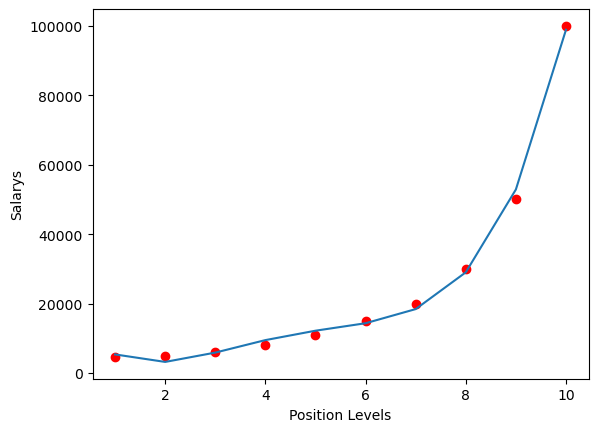

In [8]:
plt.xlabel('Position Levels')
plt.ylabel('Salarys')
plt.scatter(df.Level , df.Salary , color="red")
plt.plot(df['Level'],reg.predict(xPolynomial), label = "Polynomial regression")

## Derece arttıkça modelin doğruluğu artar fakat yüksek data sayılarda optimize olmayacağı için uygun derece değeri bulunmalıdır

#

### örneğimizi inceleyelim. 4.5 seviye biri için maaş hesaplıyoruz.

In [10]:
xPolynomialPrediction = polynomialRegression.fit_transform([[4.5]])
reg.predict(xPolynomialPrediction)

array([10958.21496213])